In [2]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#Cargamos los datos
data = pd.read_csv('Pacientes.csv', encoding='latin-1')

In [12]:
#Exploración inicial de los datos
display(data.head())
print("Información del dataset:")
print(data.info())

,Numero,Nombre,Apellido,Provincia,Edad,Sexo,Diagnostico,Especialidad,Fecha,Costo
0,2471,Zola,Davida,Moca,80,F,TULAREMIA GASTROINTESTINAL,Bioquimica,3/9/2021,9162.67
1,229,Aretha,Marleen,La Vega,89,F,TULAREMIA GENERALIZADA,Oftalmologia,3/17/2021,2026.96
2,16,Sharla,Steph,Hermanas Mirabal,67,F,OTRAS FORMAS DE TULAREMIA,Endocrinologia y nutricion,7/6/2021,9542.65
3,1,Gresham,Timotha,Perdernales,33,F,TULAREMIA NO ESPECIFICADA,Dermatologia,7/7/2021,8906.99
4,87,Hayleigh,Rosalind,Barahora,34,F,CARBUNCO CUTANEO,Neurologia,7/16/2021,9436.84


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Numero        46 non-null     int64  
 1   Nombre        46 non-null     object 
 2   Apellido      46 non-null     object 
 3   Provincia     46 non-null     object 
 4   Edad          46 non-null     int64  
 5   Sexo          46 non-null     object 
 6   Diagnostico   46 non-null     object 
 7   Especialidad  46 non-null     object 
 8   Fecha         46 non-null     object 
 9   Costo         46 non-null     float64
dtypes: float64(1), int64(2), object(7)
memory usage: 3.7+ KB
None


In [13]:
#Convertir variables categóricas a numéricas
categorical_columns = ['Nombre', 'Apellido', 'Provincia', 'Sexo', 'Diagnostico', 'Especialidad']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [14]:
#Separar características y etiqueta objetivo
data_encoded['Costo_categorico'] = pd.qcut(data['Costo'], q=3, labels=[0, 1, 2])  # Categorizamos el costo
X = data_encoded.drop(['Numero', 'Fecha', 'Costo', 'Costo_categorico'], axis=1)
y = data_encoded['Costo_categorico']

In [15]:
#División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#Entrenamiento del modelo
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [18]:
#Evaluación del modelo
y_pred = clf.predict(X_test)
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Precisión del modelo: 0.4
Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.50      0.25      0.33         4
           2       0.29      0.67      0.40         3

    accuracy                           0.40        10
   macro avg       0.60      0.42      0.41        10
weighted avg       0.59      0.40      0.40        10



In [19]:
# Mostrar el árbol de decisiones
print("\nEstructura del árbol de decisiones:\n")
print(export_text(clf, feature_names=list(X.columns)))


Estructura del árbol de decisiones:

|--- Especialidad_Neurologia <= 0.50
|   |--- Provincia_Los Guandules <= 0.50
|   |   |--- Especialidad_Neumologia <= 0.50
|   |   |   |--- Provincia_Bayahibe <= 0.50
|   |   |   |   |--- Especialidad_Oftalmologia <= 0.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Especialidad_Oftalmologia >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Provincia_Bayahibe >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Especialidad_Neumologia >  0.50
|   |   |   |--- class: 2
|   |--- Provincia_Los Guandules >  0.50
|   |   |--- class: 0
|--- Especialidad_Neurologia >  0.50
|   |--- class: 1



In [25]:
print(feature_importances)

                           feature  importance
159        Especialidad_Neurologia    0.238697
158        Especialidad_Neumologia    0.224282
102        Provincia_Los Guandules    0.205819
160      Especialidad_Oftalmologia    0.174229
90              Provincia_Bayahibe    0.156972
..                             ...         ...
154       Especialidad_Hematologia    0.000000
157  Especialidad_Medicina Interna    0.000000
156  Especialidad_Medicina General    0.000000
155      Especialidad_Infectologia    0.000000
161     Especialidad_Traumatologia    0.000000

[162 rows x 2 columns]


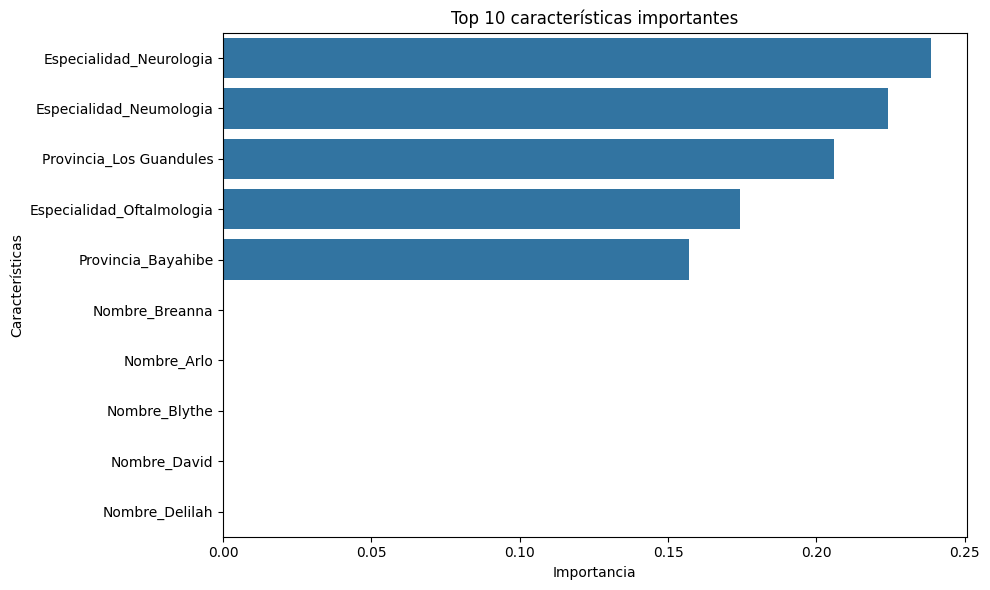

In [27]:
#Visualización de importancia de características
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
top_features = feature_importances.head(10)  # Muestra solo las 10 principales
sns.barplot(x='importance', y='feature', data=top_features)
plt.title('Top 10 características importantes')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.tight_layout()  # Ajusta para evitar que se superpongan elementos
plt.show()

In [23]:
# 7. Conclusiones
print("Conclusiones: ")
print("1. Las características más importantes para predecir el costo son:")
print(feature_importances.head(5).to_string(index=False))
print("2. El modelo tiene una precisión de {:.2f}% en el conjunto de prueba.".format(accuracy_score(y_test, y_pred) * 100))
print("3. Dependiendo de las características seleccionadas, las decisiones pueden guiar la atención hacia áreas clave en el manejo de pacientes.")


Conclusiones: 
1. Las características más importantes para predecir el costo son:
                  feature  importance
  Especialidad_Neurologia    0.238697
  Especialidad_Neumologia    0.224282
  Provincia_Los Guandules    0.205819
Especialidad_Oftalmologia    0.174229
       Provincia_Bayahibe    0.156972
2. El modelo tiene una precisión de 40.00% en el conjunto de prueba.
3. Dependiendo de las características seleccionadas, las decisiones pueden guiar la atención hacia áreas clave en el manejo de pacientes.
